**<font size=4>Add Interactive Controls to a Live Script</font>**

You can add sliders and drop-downs to your live scripts to control variable values interactively. Adding interactive controls to a script is useful when you want to share the script with others. Use interactive controls to set and change the values of variables in your live script using familiar user interface components such as numeric sliders and drop-down lists.

**Insert Numeric Slider**

A numeric slider allows you to interactively change the value of a variable by moving the slider thumb to the desired numeric value. To insert a numeric slider, use these steps:

1. Select an existing numeric value (optional).
2. Go to the **Insert** tab, click **Control**, and select **Numeric Slider**.
3. Specify a minimum value, a maximum value, and a step size, and then press **Enter**. 

The value to the left of the slider is the current value of the slider.

**Insert Drop-Down List**

A drop-down list allows you to interactively change the value of a variable by selecting from a list of text values. To insert a drop-down list, use these steps:

1. Select an existing text value (optional).
2. Go to the **Insert** tab, click **Control**, and select **Drop Down**.
3. Enter additional lines of text and press **Tab**. Make sure to enclose text values in quotes, because the Live Editor interprets each item in the list as code.

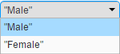

The text displayed in the drop-down list is its current value.

**Create Live Script with Multiple Interactive Controls**

This example shows how you can use interactive controls to visualize and investigate patient data in MATLAB®. The example plots the height versus the weight of either male or female patients, and highlights the patients over a specified height and weight.

Use the interactive controls to specify the gender of the patients to plot, as well as the threshold height and weight. To view and interact with the controls, open this example in your browser or in MATLAB. 

In [45]:
import numpy as np
from scipy.io import loadmat
import ipywidgets as widgets
from ipywidgets import interact,interact_manual
from IPython.display import display
import matplotlib.pyplot as plt

patient_stat = loadmat('patient.mat')

def myfunc(thresholdHeight,thresholdWeight,selectedGender):
    Gen1 = np.array(np.where(patient_stat['Gender'].flatten()=='Male')).flatten()
    Wgt1 = np.array(np.where(patient_stat['Weight'].flatten()>=thresholdWeight)).flatten()
    Hgt1 = np.array(np.where(patient_stat['Height'].flatten()>=thresholdHeight)).flatten()
    ordi_select = np.array([])
    over_select = np.array([])
    for i in range(len(patient_stat['Gender'])):
        Gen_select = np.where(Gen1==i)
        if Gen_select[0].tolist() != []:
            ordi_select = np.append(ordi_select,i)
    for i in range(len(patient_stat['Gender'])):
        Gen_select = np.where(Gen1==i)    
        Wgt_select = np.where(Wgt1==i)    
        Hgt_select = np.where(Hgt1==i)
        if Gen_select[0].tolist() != []:
            if Wgt_select[0].tolist() != []:
                if Hgt_select[0].tolist() != []:
                    over_select = np.append(over_select,i)
    overThresholdWeights = np.take(patient_stat['Weight'].flatten(),over_select.tolist())
    overThresholdHeights = np.take(patient_stat['Height'].flatten(),over_select.tolist())
    ordinaryWeights = np.take(patient_stat['Weight'].flatten(),ordi_select.tolist())
    ordinaryHeights = np.take(patient_stat['Height'].flatten(),ordi_select.tolist())
    plt.scatter(ordinaryHeights,ordinaryWeights,c='white',edgecolors='blue')
    sp2 = plt.scatter(overThresholdHeights,overThresholdWeights,c='white',edgecolors='red',
                     label='Patients over '+str(thresholdHeight)+' inches and '+ str(thresholdWeight) +' pounds.')
    plt.title('Height vs. Weight of '+ selectedGender + ' Patients')
    plt.legend()

In [46]:
myplot = interact(myfunc,
                  thresholdHeight=widgets.IntSlider(min=60,max=72,step=1,description='thresholdHeight:'),
                  thresholdWeight=widgets.IntSlider(min=111,max=202,step=1,description='thresholdWeight:'),
                  selectedGender=widgets.Dropdown(options=['Male','Female'],value='Male',description='selectedGender:'))

interactive(children=(IntSlider(value=60, description='thresholdHeight:', max=72, min=60), IntSlider(value=111…

In [48]:
myplot = interact_manual(myfunc,
                  thresholdHeight=widgets.IntSlider(min=60,max=72,step=1,description='thresholdHeight:'),
                  thresholdWeight=widgets.IntSlider(min=111,max=202,step=1,description='thresholdWeight:'),
                  selectedGender=widgets.Dropdown(options=['Male','Female'],value='Male',description='selectedGender:'))

interactive(children=(IntSlider(value=60, description='thresholdHeight:', max=72, min=60), IntSlider(value=111…

**Share Live Script**

When the live script is ready, share it with others. Users can open the live script in MATLAB and experiment with using the controls interactively. Run the live script to see the updated results.

If you share the live script as a static PDF, HTML, or LaTeX document, the Live Editor saves the control as code. For example, in the live script shown here, the Live Editor replaces the slider controls with their current value (68 and 132) and replaces the drop-down control with the current value of the drop-down `("Female")`.

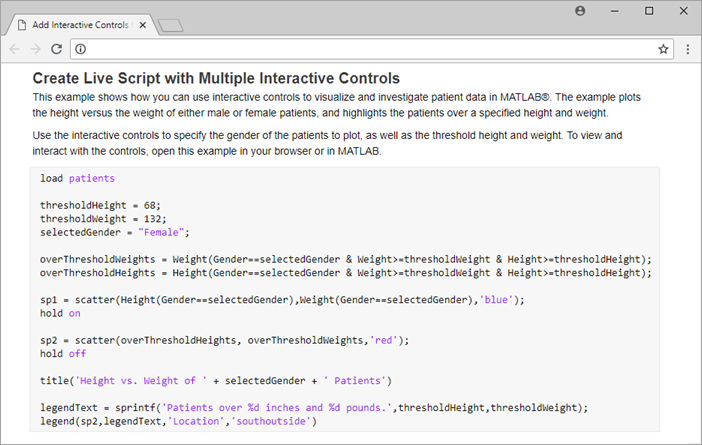

Copyright 2018 The MathWorks, Inc.